This chapter focuses on a popular clustering algorithm - hierarchical clustering - and its implementation in SciPy. In addition to the procedure to perform hierarchical clustering, it attempts to help you answer an important question - how many clusters are present in your data? The chapter concludes with a discussion on the limitations of hierarchical clustering and discusses considerations while using hierarchical clustering.

In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
cc_list = [[1.70000000e+01, 4.00000000e+00, 5.09349050e-01, 9.00098454e-02],[2.00000000e+01, 6.00000000e+00, 5.99234177e-01, 1.35014768e-01],[3.50000000e+01, 0.00000000e+00, 1.04865981e+00, 0.00000000e+00],[1.40000000e+01, 0.00000000e+00, 4.19463924e-01, 0.00000000e+00],[3.70000000e+01, 4.00000000e+00, 1.10858323e+00, 9.00098454e-02],[3.30000000e+01, 3.00000000e+00, 9.88736392e-01, 6.75073840e-02],[1.40000000e+01, 1.00000000e+00, 4.19463924e-01, 2.25024613e-02],[3.00000000e+01, 6.00000000e+00, 8.98851266e-01, 1.35014768e-01],[3.50000000e+01, 5.00000000e+00, 1.04865981e+00, 1.12512307e-01],[1.70000000e+01, 4.00000000e+00, 5.09349050e-01, 9.00098454e-02],[1.10000000e+01, 6.00000000e+00, 3.29578797e-01, 1.35014768e-01],[2.10000000e+01, 1.00000000e+01, 6.29195886e-01, 2.25024613e-01],[1.30000000e+01, 8.00000000e+00, 3.89502215e-01, 1.80019691e-01],[1.00000000e+01, 1.00000000e+01, 2.99617089e-01, 2.25024613e-01],[8.10000000e+01, 9.70000000e+01, 2.42689842e+00, 2.18273875e+00],[8.40000000e+01, 9.40000000e+01, 2.51678354e+00, 2.11523137e+00],[8.70000000e+01, 9.90000000e+01, 2.60666867e+00, 2.22774367e+00],[8.30000000e+01, 9.50000000e+01, 2.48682183e+00, 2.13773383e+00],[9.00000000e+01, 9.50000000e+01, 2.69655380e+00, 2.13773383e+00],[9.70000000e+01, 9.70000000e+01, 2.90628576e+00, 2.18273875e+00],[9.40000000e+01, 9.90000000e+01, 2.81640063e+00, 2.22774367e+00],[8.80000000e+01, 9.90000000e+01, 2.63663038e+00, 2.22774367e+00],[8.90000000e+01, 9.40000000e+01, 2.66659209e+00, 2.11523137e+00],[9.30000000e+01, 9.90000000e+01, 2.78643892e+00, 2.22774367e+00],[9.20000000e+01, 9.00000000e+01, 2.75647721e+00, 2.02522152e+00],[8.20000000e+01, 9.80000000e+01, 2.45686013e+00, 2.20524121e+00],[8.10000000e+01, 1.00000000e+02, 2.42689842e+00, 2.25024613e+00],[9.20000000e+01, 9.30000000e+01, 2.75647721e+00, 2.09272890e+00],[9.10000000e+01, 9.80000000e+01, 2.72651551e+00, 2.20524121e+00],[2.20000000e+01, 1.50000000e+01, 6.59157595e-01, 3.37536920e-01],[2.30000000e+01, 1.00000000e+01, 6.89119304e-01, 2.25024613e-01],[2.50000000e+01, 0.00000000e+00, 7.49042721e-01, 0.00000000e+00],[2.50000000e+01, 1.00000000e+01, 7.49042721e-01, 2.25024613e-01],[2.70000000e+01, 7.00000000e+00, 8.08966139e-01, 1.57517229e-01],[1.70000000e+01, 1.70000000e+01, 5.09349050e-01, 3.82541843e-01],[1.70000000e+01, 1.50000000e+01, 5.09349050e-01, 3.37536920e-01]]
comic_con = pd.DataFrame(cc_list, columns=['x_coordinate','y_coordinate','x_scaled','y_scaled'])

# Basics of hierarchical clustering

### Hierarchical clustering: ward method

It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

The data is stored in a pandas DataFrame, `comic_con`. `x_scaled` and `y_scaled` are the column names of the standardized `X` and `Y` coordinates of people at a given point in time.

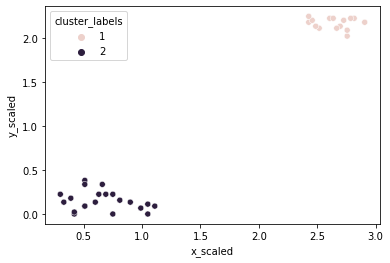

In [8]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Hierarchical clustering: single method

Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a pandas DataFrame, `comic_con`. `x_scaled` and` y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time.

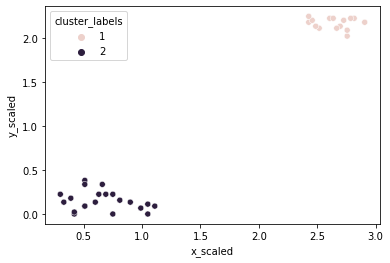

In [9]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Hierarchical clustering: complete method

For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a pandas DataFrame, `comic_con`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time.

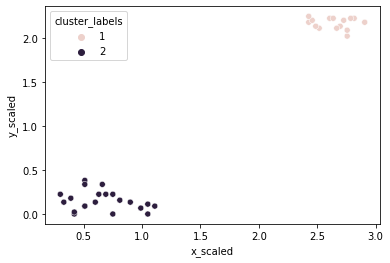

In [10]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# Visualize clusters

### Visualize clusters with matplotlib

We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

The data is stored in a pandas DataFrame, c`omic_con`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time. `cluster_labels` has the cluster labels. A linkage object is stored in the variable `distance_matrix`.